# String breaking code

In [5]:
using MPSKit, TensorKit, Plots, LaTeXStrings, LinearAlgebra

In [91]:
d = 2000 # local Hilbert space dimension, before truncating
D = 20

20

In [92]:
function matrix_elems(d)
    phi    = zeros(ComplexF64, (d, d))
    phi_sq = zeros(ComplexF64, (d, d))
    pi_sq  = zeros(ComplexF64, (d, d))
    phi_4  = zeros(ComplexF64, (d, d))

    # phi = (a + a^\dagger)/sqrt(2)
    for i in 2:d
    	val = sqrt((i - 1)/ 2)
        phi[i, i - 1] = val
        phi[i - 1, i] = val
    end

    # helper to fill phi_sq and pi_sq (same structure, sign flip on off-diagonals)
    function fill_quadratic!(M, sign)
        @inbounds for i in 1:d
            if i < d - 1
                val = sign * sqrt(i * (i + 1)) / 2
                M[i, i + 2] = val
                M[i + 2, i] = val  # Hermitian
            end
            M[i, i] = (2 * i - 1) / 2
        end
    end

    fill_quadratic!(phi_sq, +1)
    fill_quadratic!(pi_sq,  -1)

    # phi^4 in harmonic oscillator basis
    @inbounds for i in 1:d
        n = i - 1  # occupation number

        # diagonal
        phi_4[i, i] = (6 * n^2 + 6 * n + 3) / 4

        # connect |n> <-> |n+2>
        if i + 2 <= d
            val = (4 * n + 6) * sqrt((n + 1) * (n + 2)) / 4
            j = i + 2
            phi_4[i, j] = val
            phi_4[j, i] = val  # Hermitian
        end

        # connect |n> <-> |n+4>
        if i + 4 <= d
            val = sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
            j = i + 4
            phi_4[i, j] = val
            phi_4[j, i] = val  # Hermitian
        end
    end
    return phi, phi_sq, pi_sq, phi_4
end

matrix_elems (generic function with 1 method)

In [93]:
phi, phi_sq, pi_sq, phi_4 = matrix_elems(d)

(ComplexF64[0.0 + 0.0im 0.7071067811865476 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.7071067811865476 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 31.614869919074472 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 31.614869919074472 + 0.0im 0.0 + 0.0im], ComplexF64[0.5 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.5 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 1998.5 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 1999.5 + 0.0im], ComplexF64[0.5 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.5 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 1998.5 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 1999.5 + 0.0im], ComplexF64[0.75 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 3.75 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 5.99100375e6 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 5.99700075e6 + 0.0im])

In [94]:
β = 1.0
μ = 0.5
κ = 0.1
m = 1

1

In [95]:
iden_mat = Array(I, d, d);

In [96]:
ham_mat = (m^2 * phi_sq + pi_sq)/2 + μ^2 * (iden_mat - cos(β * phi));

In [97]:
evals, evecs = eigen(ham_mat);

In [116]:
d_trunc = 12

12

In [117]:
norm(ham_mat * evecs[:, 200] - evals[200] * evecs[:, 200])

2.363310135983198e-12

In [118]:
U = evecs[:, 1:d_trunc]
ε = evals[1:d_trunc]

12-element Vector{Float64}:
  0.5530743847569582
  1.6478546099767517
  2.721109788858832
  3.7753223692819233
  4.813050735848881
  5.836845627980048
  6.849167824125584
  7.852316802612778
  8.848377418073511
  9.839187646198
 10.82632655152127
 11.811118884665326

In [119]:
norm(U' * ham_mat * U - Diagonal(ε))

2.2413799435988873e-12

In [120]:
ϕ_mat = U' * phi * U
ϕ_sq_mat = U' * phi_sq * U
π_sq_mat = U' * pi_sq * U
ϕ_4_mat = U' * phi_4 * U

12×12 Matrix{ComplexF64}:
     0.629825+0.0im  -2.31717e-13+0.0im  …  -3.05406e-13+0.0im
 -2.31717e-13+0.0im       3.23251+0.0im      -0.00077979+0.0im
      1.81269+0.0im  -5.64698e-13+0.0im     -2.20503e-12+0.0im
 -2.11706e-13+0.0im      -5.38036+0.0im       -0.0262844+0.0im
     -1.03052+0.0im   1.47675e-12+0.0im      8.77797e-12+0.0im
  1.17887e-12+0.0im       2.35195+0.0im  …     -0.302693+0.0im
   -0.0311156+0.0im   8.66355e-14+0.0im      5.78473e-13+0.0im
 -1.90086e-12+0.0im     0.0737105+0.0im         -21.2379+0.0im
   0.00275984+0.0im   2.87682e-12+0.0im     -3.90555e-11+0.0im
  8.45058e-13+0.0im    0.00757399+0.0im          111.356+0.0im
  0.000262156+0.0im  -4.21102e-12+0.0im  …   1.36377e-11+0.0im
 -3.05406e-13+0.0im   -0.00077979+0.0im          203.691+0.0im

In [121]:
ϕ_mat

12×12 Matrix{ComplexF64}:
 -1.05561e-13+0.0im      0.675789+0.0im  …   -3.86772e-8+0.0im
     0.675789+0.0im   5.62401e-14+0.0im      5.84999e-14+0.0im
   -4.362e-14+0.0im      0.965217+0.0im       2.80247e-6+0.0im
   0.00275122+0.0im   7.54559e-14+0.0im      2.48005e-14+0.0im
 -5.27149e-14+0.0im    0.00512974+0.0im       9.10518e-5+0.0im
   0.00011815+0.0im  -7.48235e-14+0.0im  …   3.97881e-13+0.0im
  5.05492e-14+0.0im   0.000277505+0.0im       0.00172171+0.0im
   6.59922e-6+0.0im  -3.44511e-14+0.0im      3.92024e-13+0.0im
  2.99486e-14+0.0im    -1.7659e-5+0.0im       -0.0135635+0.0im
   4.56449e-7+0.0im   4.88856e-14+0.0im       1.4224e-14+0.0im
  2.78133e-14+0.0im   -1.32105e-6+0.0im  …       -2.3629+0.0im
  -3.86772e-8+0.0im   5.84999e-14+0.0im     -9.96583e-13+0.0im

In [122]:
ϕ = TensorMap(ϕ_mat, ℂ^d_trunc ← ℂ^d_trunc)
H0 = TensorMap(Diagonal(ε), ℂ^d_trunc ← ℂ^d_trunc)
# don't actually need these.
ϕ2 = TensorMap(ϕ_sq_mat, ℂ^d_trunc ← ℂ^d_trunc)
π2 = TensorMap(π_sq_mat, ℂ^d_trunc ← ℂ^d_trunc)
ϕ4 = TensorMap(ϕ_4_mat, ℂ^d_trunc ← ℂ^d_trunc)

12←12 TensorMap{ComplexF64, ComplexSpace, 1, 1, Vector{ComplexF64}}:
 codomain: ⊗(ℂ^12)
 domain: ⊗(ℂ^12)


In [123]:
L = 100 # number of lattice sites

100

In [124]:
J₀ = 1.0
J₁ = 0.2

0.2

In [166]:
single_site_terms_ham = [i => H0 for i in 1:L]
# these two terms come from the gradient
single_site_terms_grad1 = [i => κ * ϕ2 / 2 for i in 1:L-1]
single_site_terms_grad2 = [i => κ * ϕ2 / 2 for i in 2:L]
# final term comes from the two site coupling in the gradient
two_site_terms_grad = [(i, i + 1) => -κ * ϕ ⊗ ϕ for i in 1:L - 1]
# source terms
source_terms_init = [i => J₀ * ϕ for i in L÷2 - 2:L÷2 + 2]
source_terms_fin = [i => J₁ * ϕ for i in L÷2 - 2:L÷2 + 2]; # final source terms

In [167]:
chain = fill(ℂ^d_trunc, L)
ham = FiniteMPOHamiltonian(chain, single_site_terms_grad1...,
    single_site_terms_grad2..., single_site_terms_ham...,
    two_site_terms_grad..., source_terms_init...);

In [168]:
ψ_gs = FiniteMPS(L, ℂ^d_trunc, ℂ^D)
ψ_gs, _, _ = find_groundstate(ψ_gs, ham, DMRG());

[ Info: DMRG init:	obj = +6.620644938618e+02	err = 9.5660e-01
[ Info: DMRG   1:	obj = +5.753826705499e+01	err = 5.9963191497e-03	time = 3.05 sec
[ Info: DMRG   2:	obj = +5.753826704939e+01	err = 2.5982478979e-07	time = 1.62 sec
[ Info: DMRG   3:	obj = +5.753826704938e+01	err = 1.8954213347e-08	time = 2.24 sec
[ Info: DMRG conv 4:	obj = +5.753826704938e+01	err = 1.6990402308e-12	time = 8.52 sec


In [169]:
ham_quench = FiniteMPOHamiltonian(chain, single_site_terms_grad1...,
    single_site_terms_grad2..., single_site_terms_ham...,
    two_site_terms_grad..., source_terms_fin...);

In [170]:
T = 200
dt = 0.1

0.1

In [171]:
flux = zeros(Float64, T, L);

In [172]:
for i in 1:L
    flux[1, i] = real(expectation_value(ψ_gs, i => ϕ))
end

In [173]:
for step in 2:T
    println("Currently at step $step")
    ψ_gs, _ = timestep(ψ_gs, ham_quench, (step - 2) * dt, dt, TDVP())
    for i in 1:L
        flux[step, i] = real(expectation_value(ψ_gs, i => ϕ))
    end
end

Currently at step 2
Currently at step 3
Currently at step 4
Currently at step 5
Currently at step 6
Currently at step 7
Currently at step 8
Currently at step 9
Currently at step 10
Currently at step 11
Currently at step 12
Currently at step 13
Currently at step 14
Currently at step 15
Currently at step 16
Currently at step 17
Currently at step 18
Currently at step 19
Currently at step 20
Currently at step 21
Currently at step 22
Currently at step 23
Currently at step 24
Currently at step 25
Currently at step 26
Currently at step 27
Currently at step 28
Currently at step 29
Currently at step 30
Currently at step 31
Currently at step 32
Currently at step 33
Currently at step 34
Currently at step 35
Currently at step 36
Currently at step 37
Currently at step 38
Currently at step 39
Currently at step 40
Currently at step 41
Currently at step 42
Currently at step 43
Currently at step 44
Currently at step 45
Currently at step 46
Currently at step 47
Currently at step 48
Currently at step 49


In [186]:
using Plots.PlotMeasures

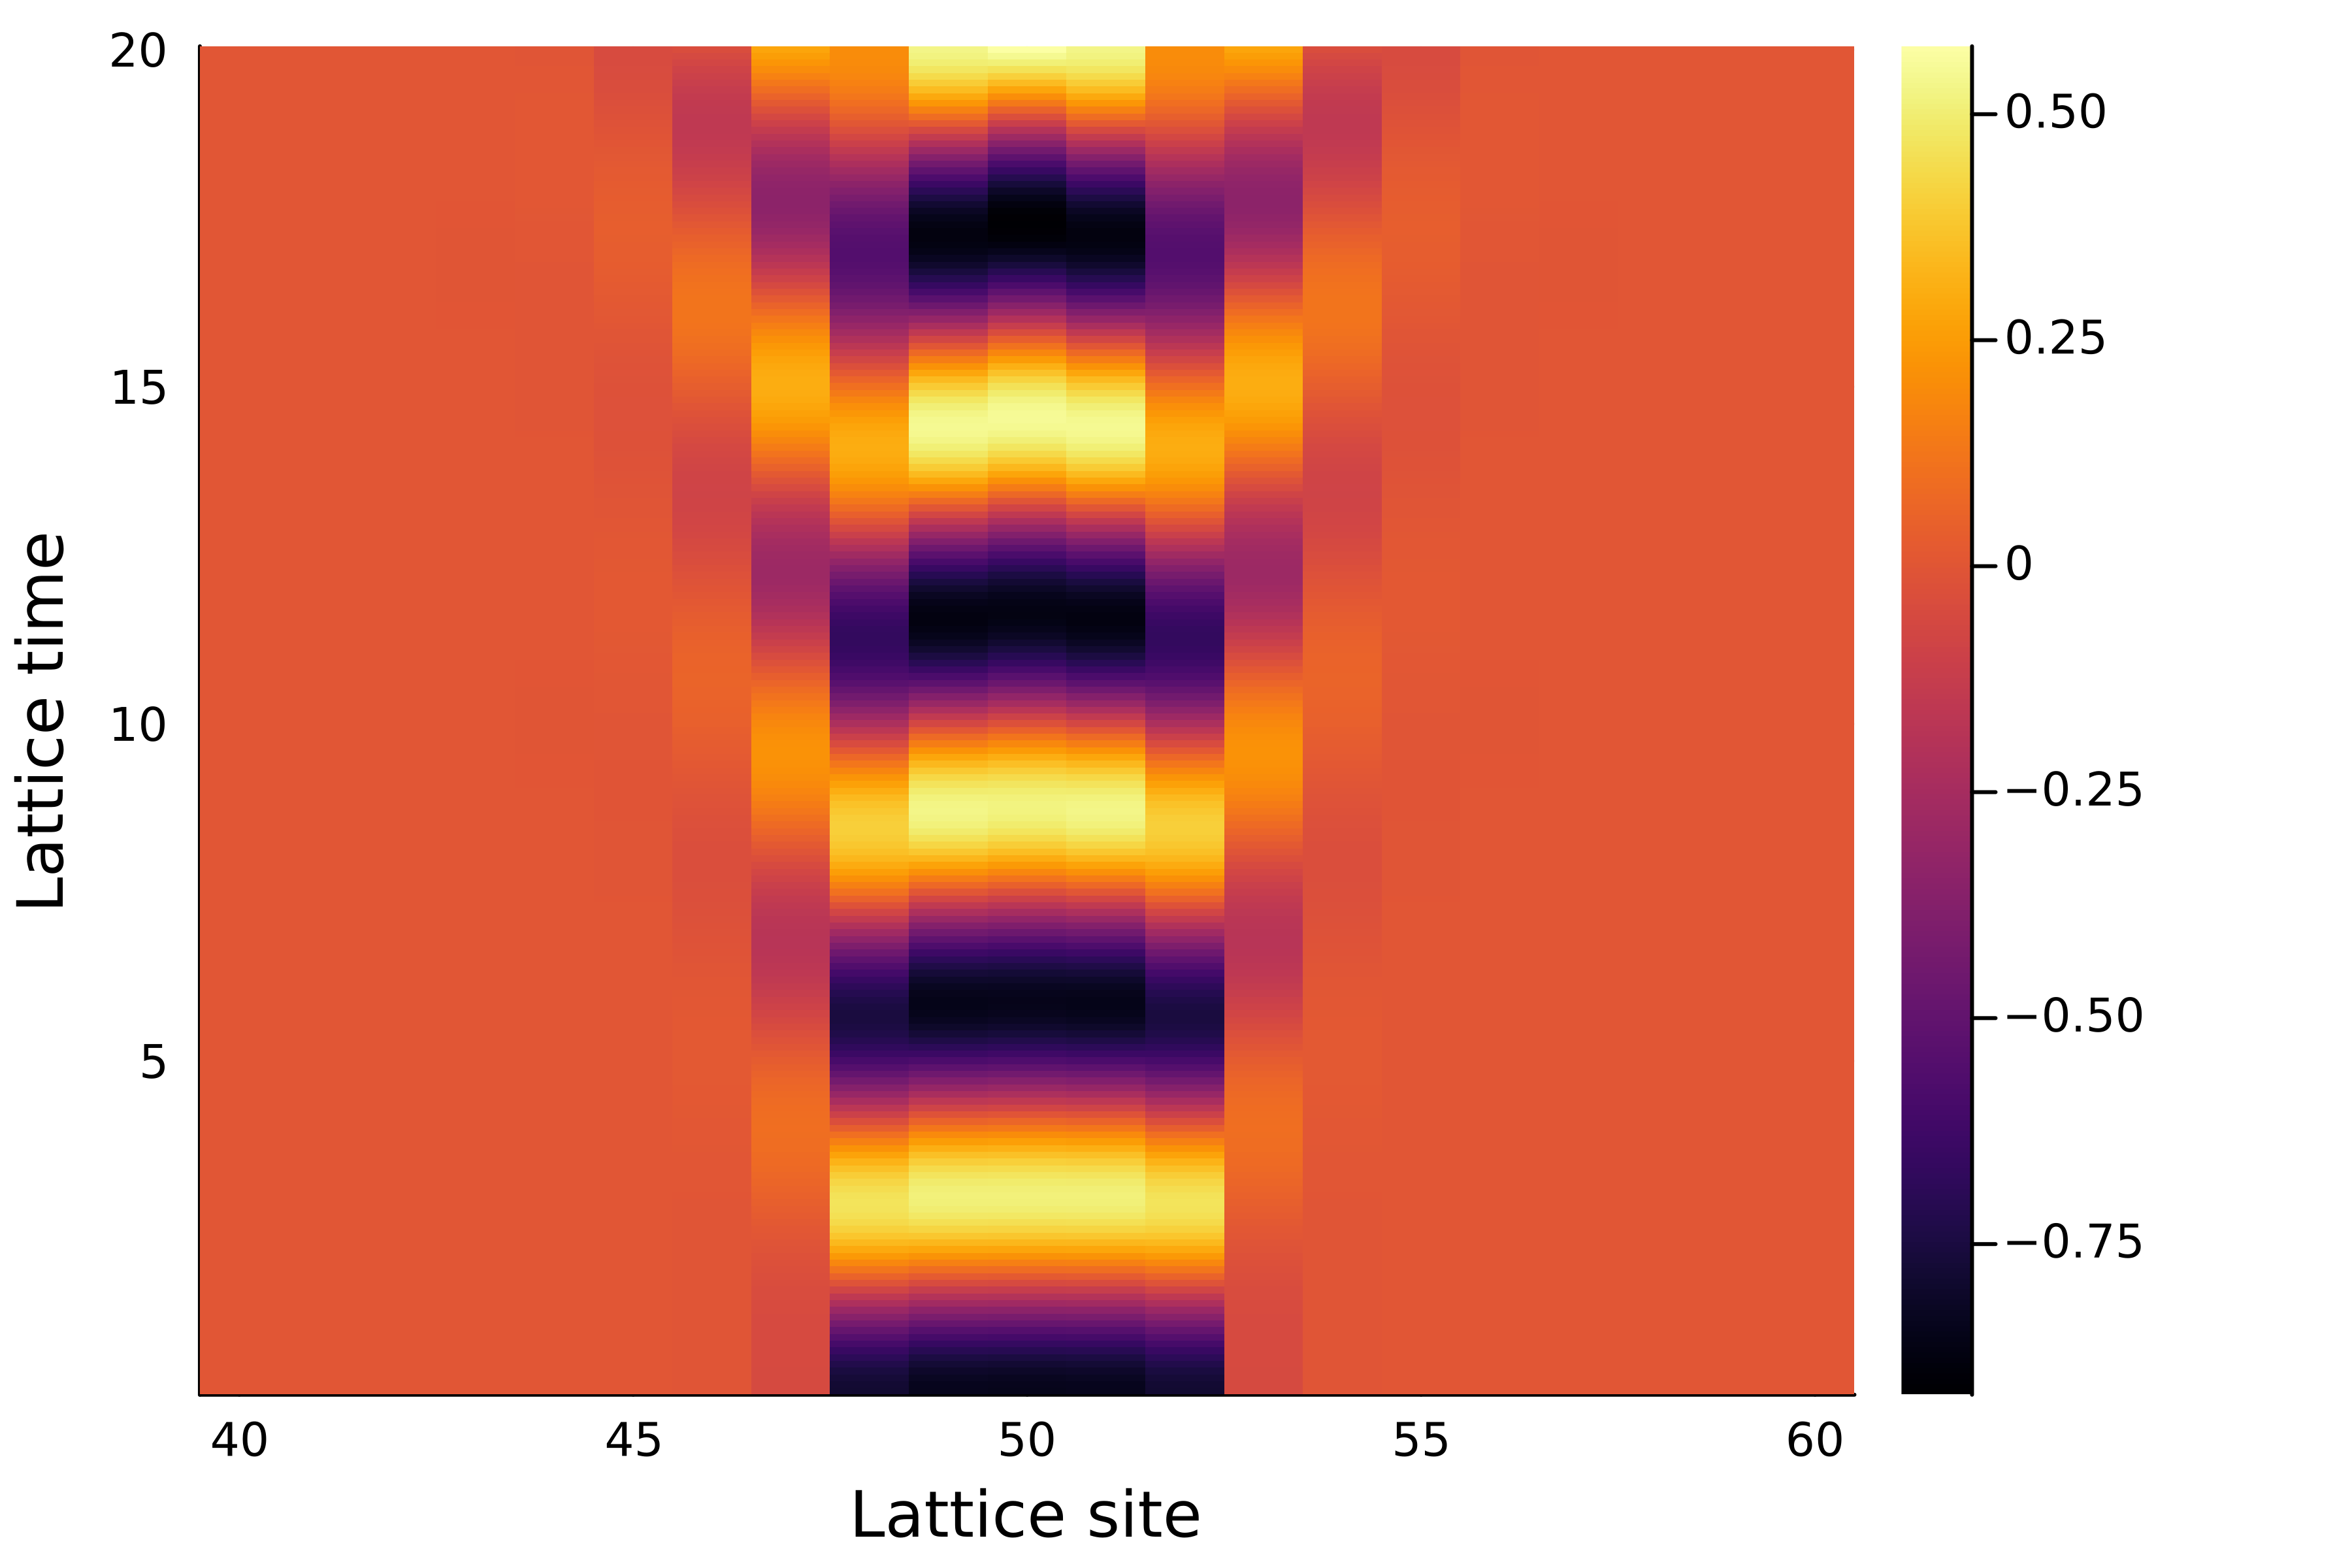

In [187]:
heatmap(L÷2 - 10:L÷2 + 10,0.1 * [1:T], flux[:, L÷2 - 10:L÷2 + 10], dpi=600, ylabel="Lattice time", xlabel="Lattice site",
right_margin = 15mm)

In [184]:
savefig("quench_dynamics_dtrunc_$(d_trunc)_D$(D).png")

"/home/ujjwal/MPSJulia/schwinger/quench_dynamics_dtrunc_12_D20.png"

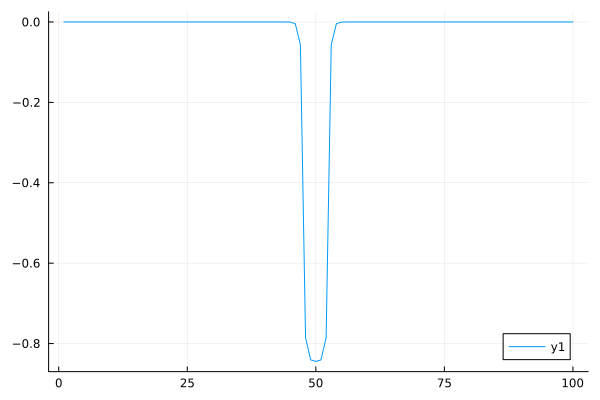

In [179]:
plot(flux[2, :])

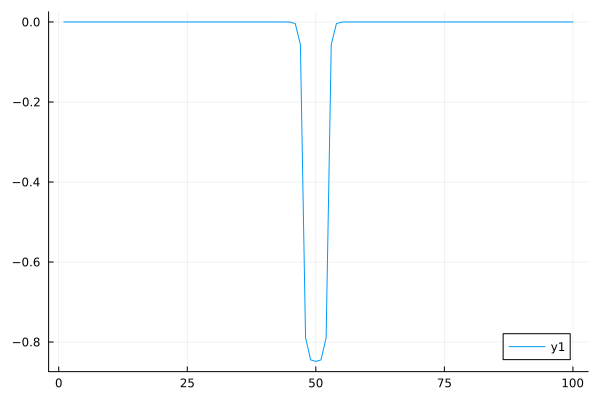

In [178]:
plot(flux[1, :])

# Data plots

In [12]:
using JLD2, Plots, LaTeXStrings

In [18]:
data_theta_pi = load("./data/quench_dynamics_dtrunc_d_12_D_20_T_2000_J0_1.0_J1_0.2_kappa_0.1_m_1.0_theta_3.14159_mu_0.5.jld2")

Dict{String, Any} with 1 entry:
  "flux" => [6.34038e-7 6.4159e-7 … 6.4159e-7 6.34038e-7; 6.34038e-7 6.4159e-7 …

In [19]:
data_theta_0 = load("./data/quench_dynamics_dtrunc_d_12_D_20_T_2000.jld2")

Dict{String, Any} with 1 entry:
  "flux" => [-4.47164e-14 -4.59639e-14 … -2.15521e-14 3.11901e-14; -4.63488e-14…

In [14]:
using Plots.PlotMeasures

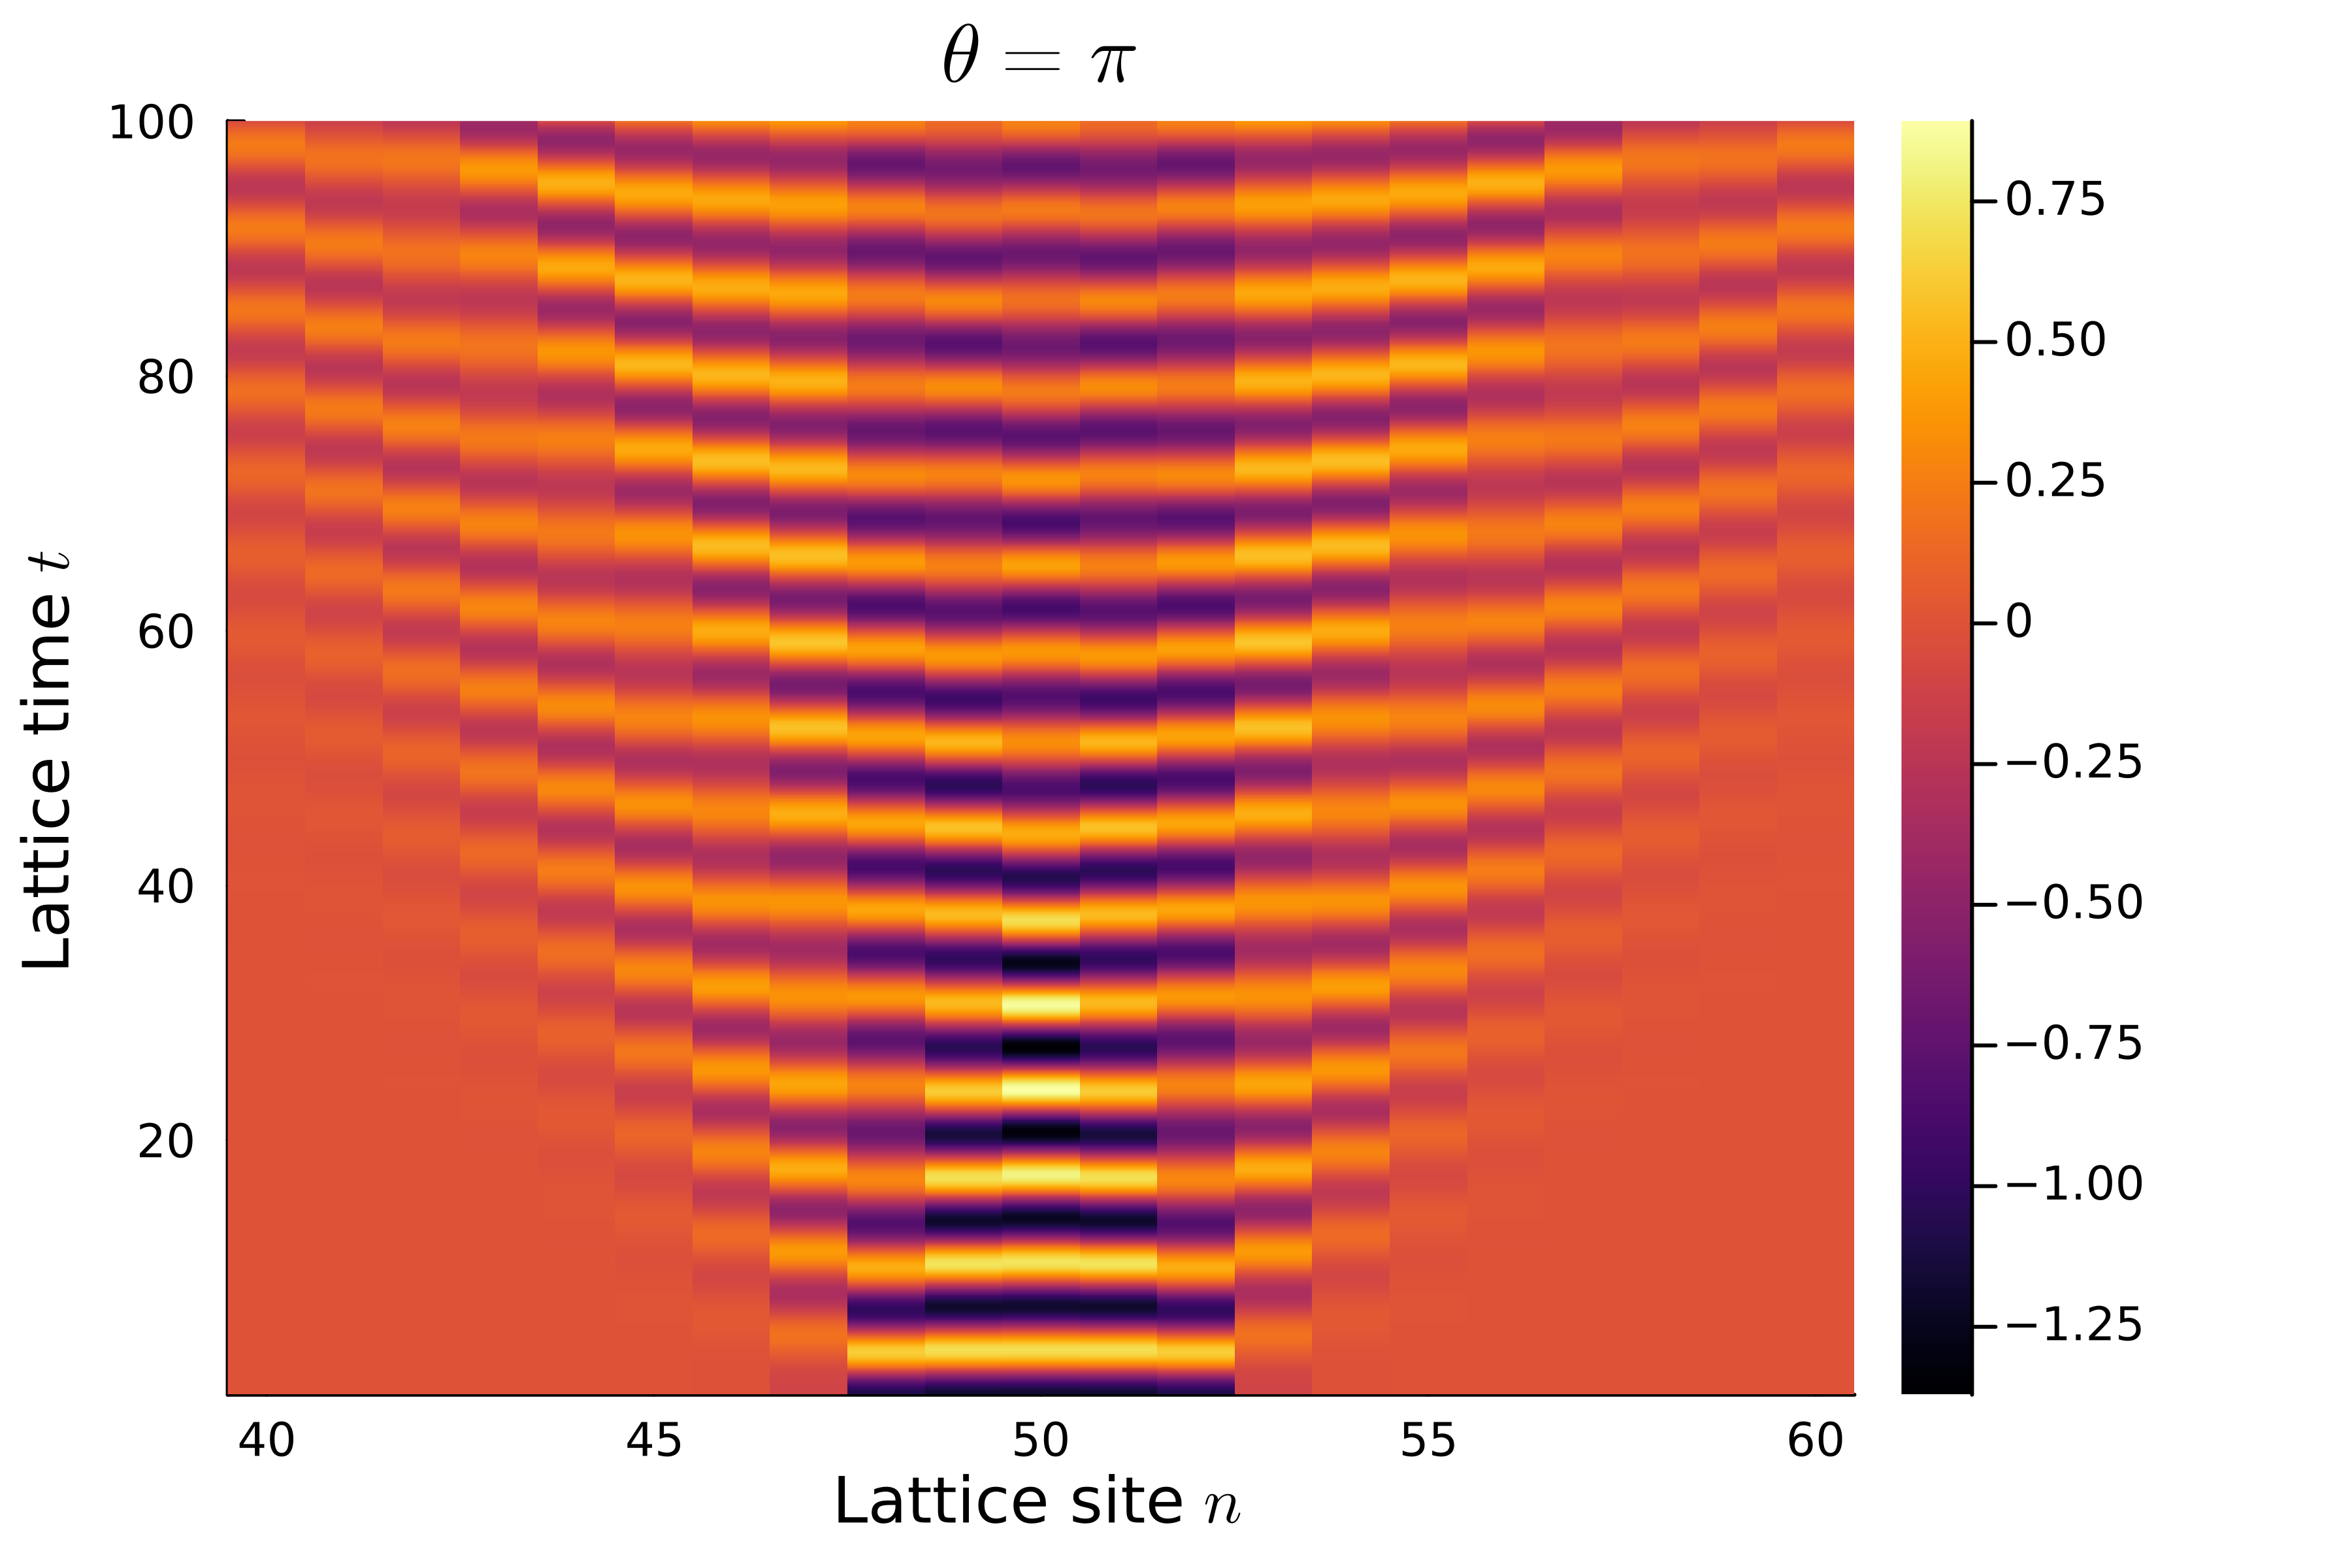

In [30]:
plot_theta_pi = heatmap(40:60, 0.05 * [1:2000], data_theta_pi["flux"][:, 40:60], right_margin=15mm,dpi=600,xlabel=L"Lattice site $n$", ylabel=L"Lattice time $t$", title=L"$\theta = \pi$")

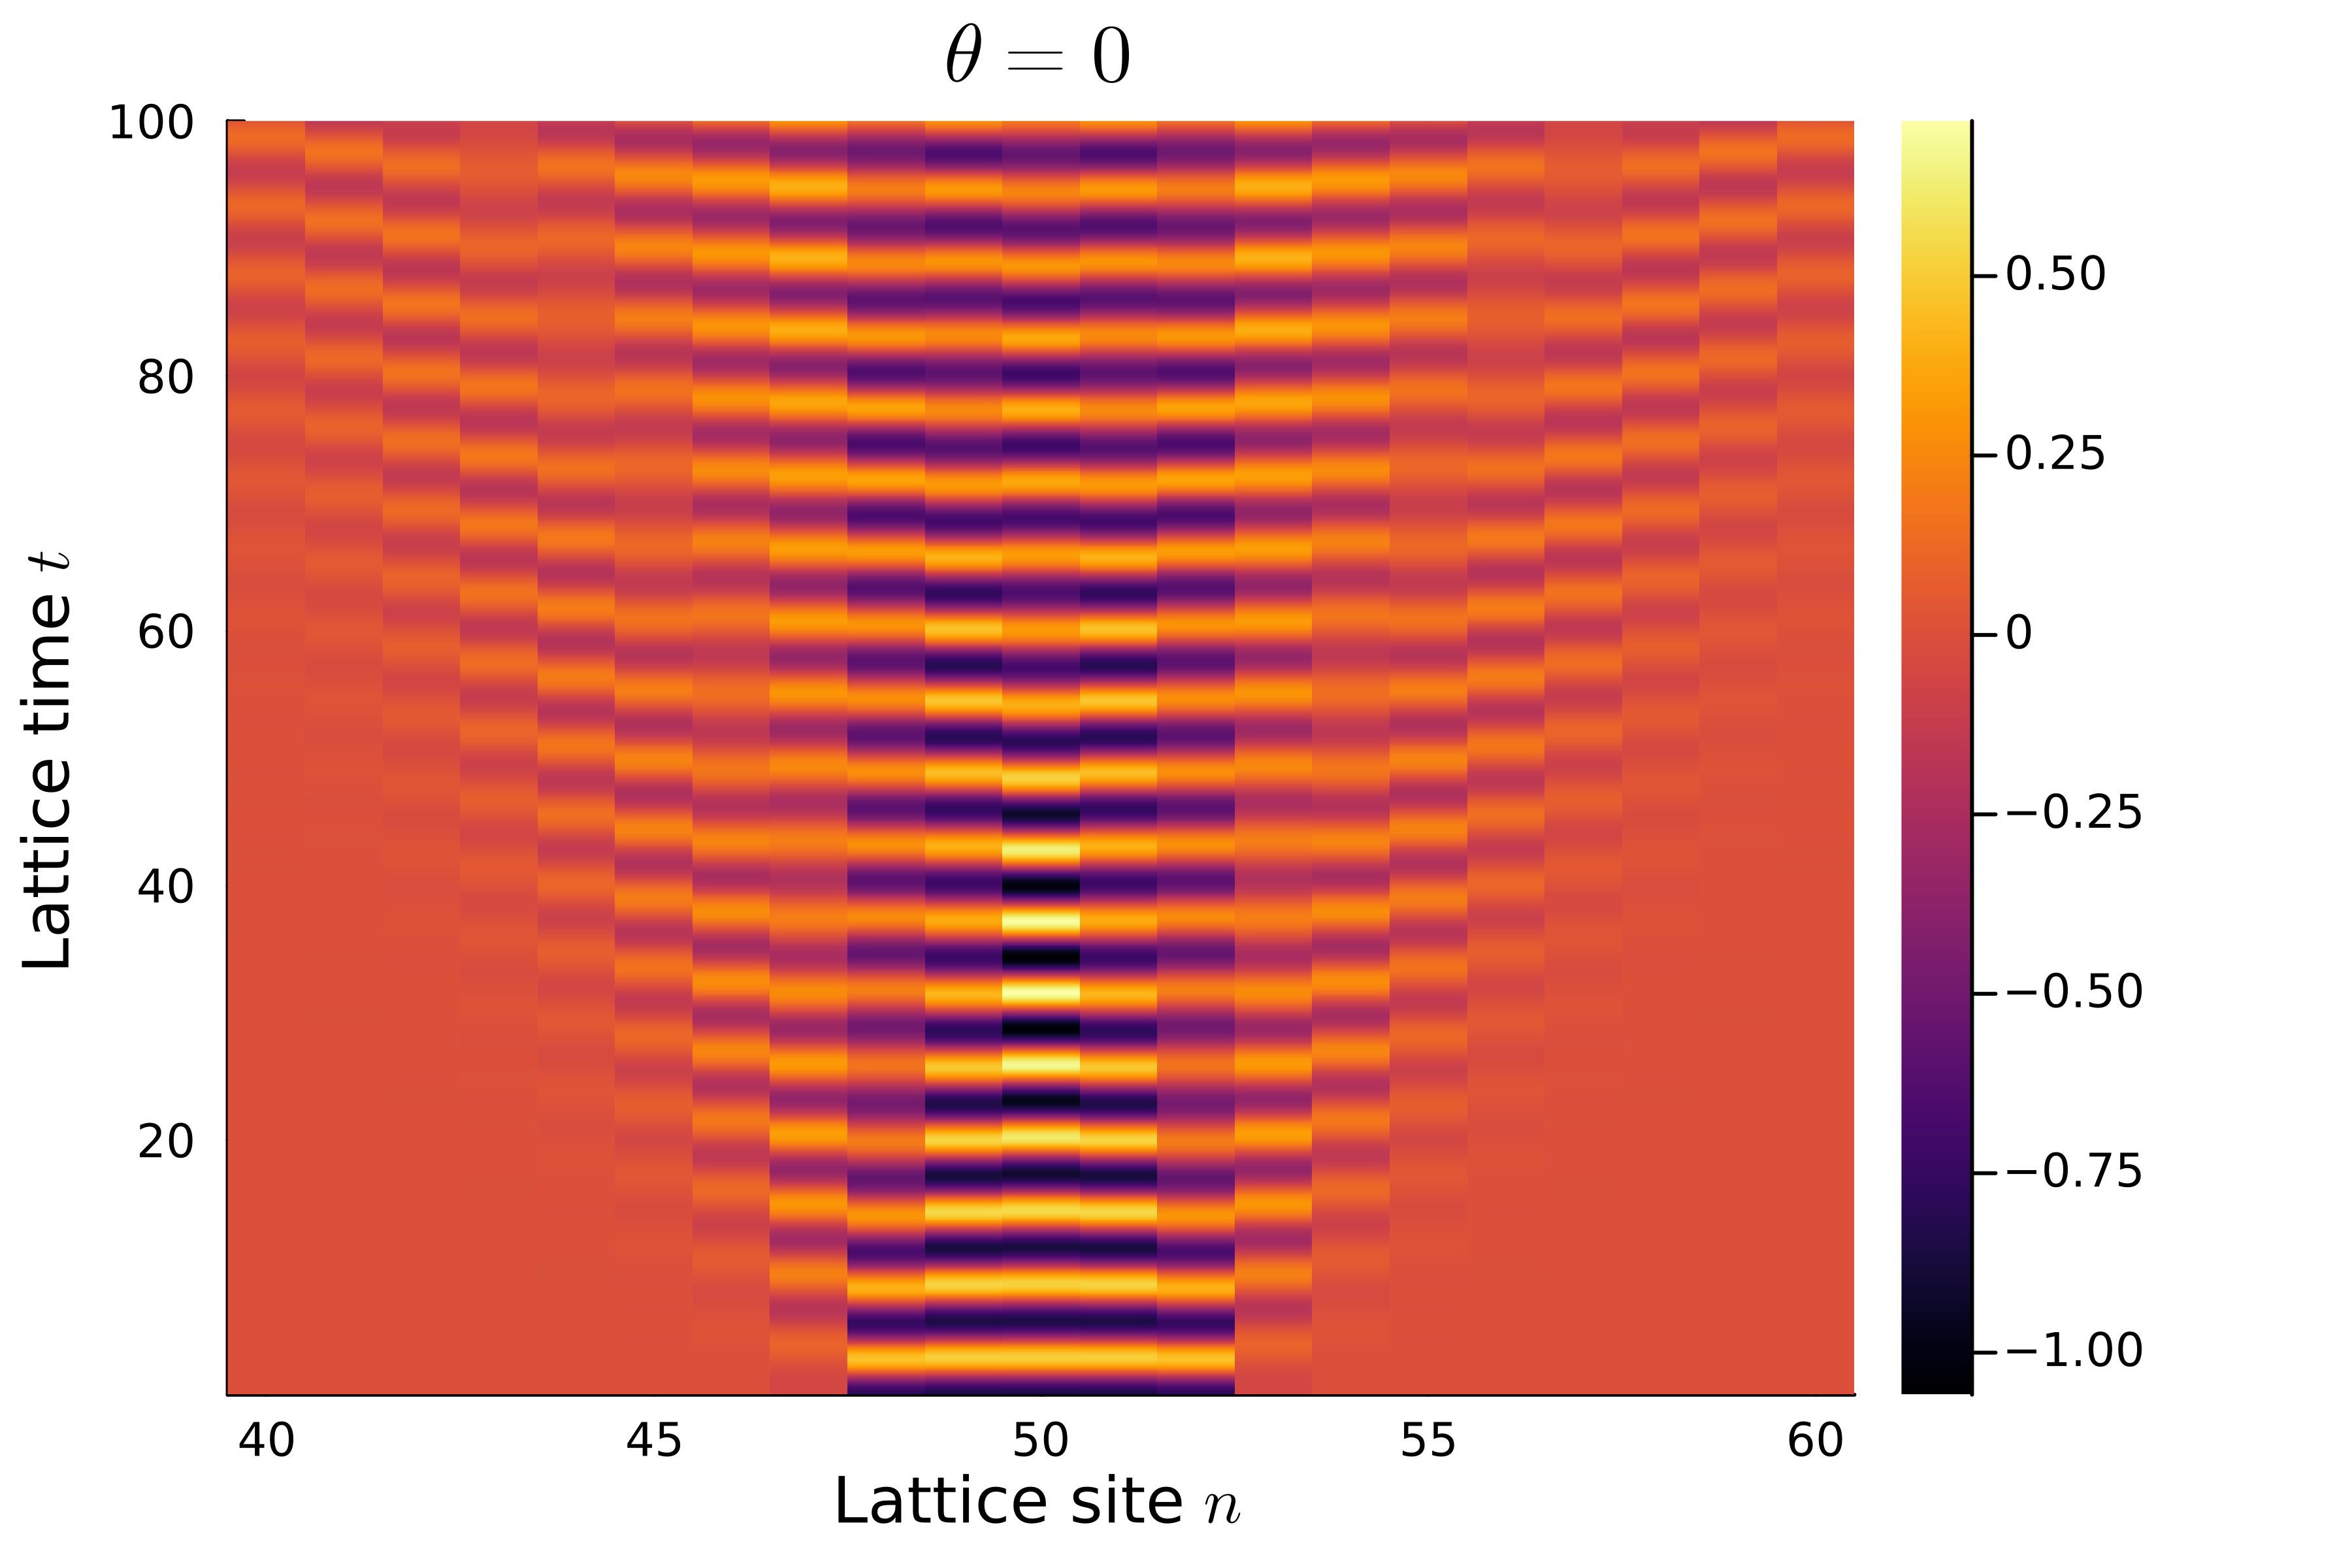

In [32]:
plot_theta_0 = heatmap(40:60, 0.05 * [1:2000], data_theta_0["flux"][:, 40:60], right_margin=15mm,dpi=600,xlabel=L"Lattice site $n$", ylabel=L"Lattice time $t$", title=L"$\theta = 0$")

In [33]:
savefig(plot_theta_pi, "quench_dynamics_dtrunc_12_D_20_T_2000_theta_pi.png")

"/home/ujjwal/MPSJulia/schwinger/quench_dynamics_dtrunc_12_D_20_T_2000_theta_pi.png"

In [34]:
savefig(plot_theta_0, "quench_dynamics_dtrunc_12_D_20_T_2000_theta_0.png")

"/home/ujjwal/MPSJulia/schwinger/quench_dynamics_dtrunc_12_D_20_T_2000_theta_0.png"

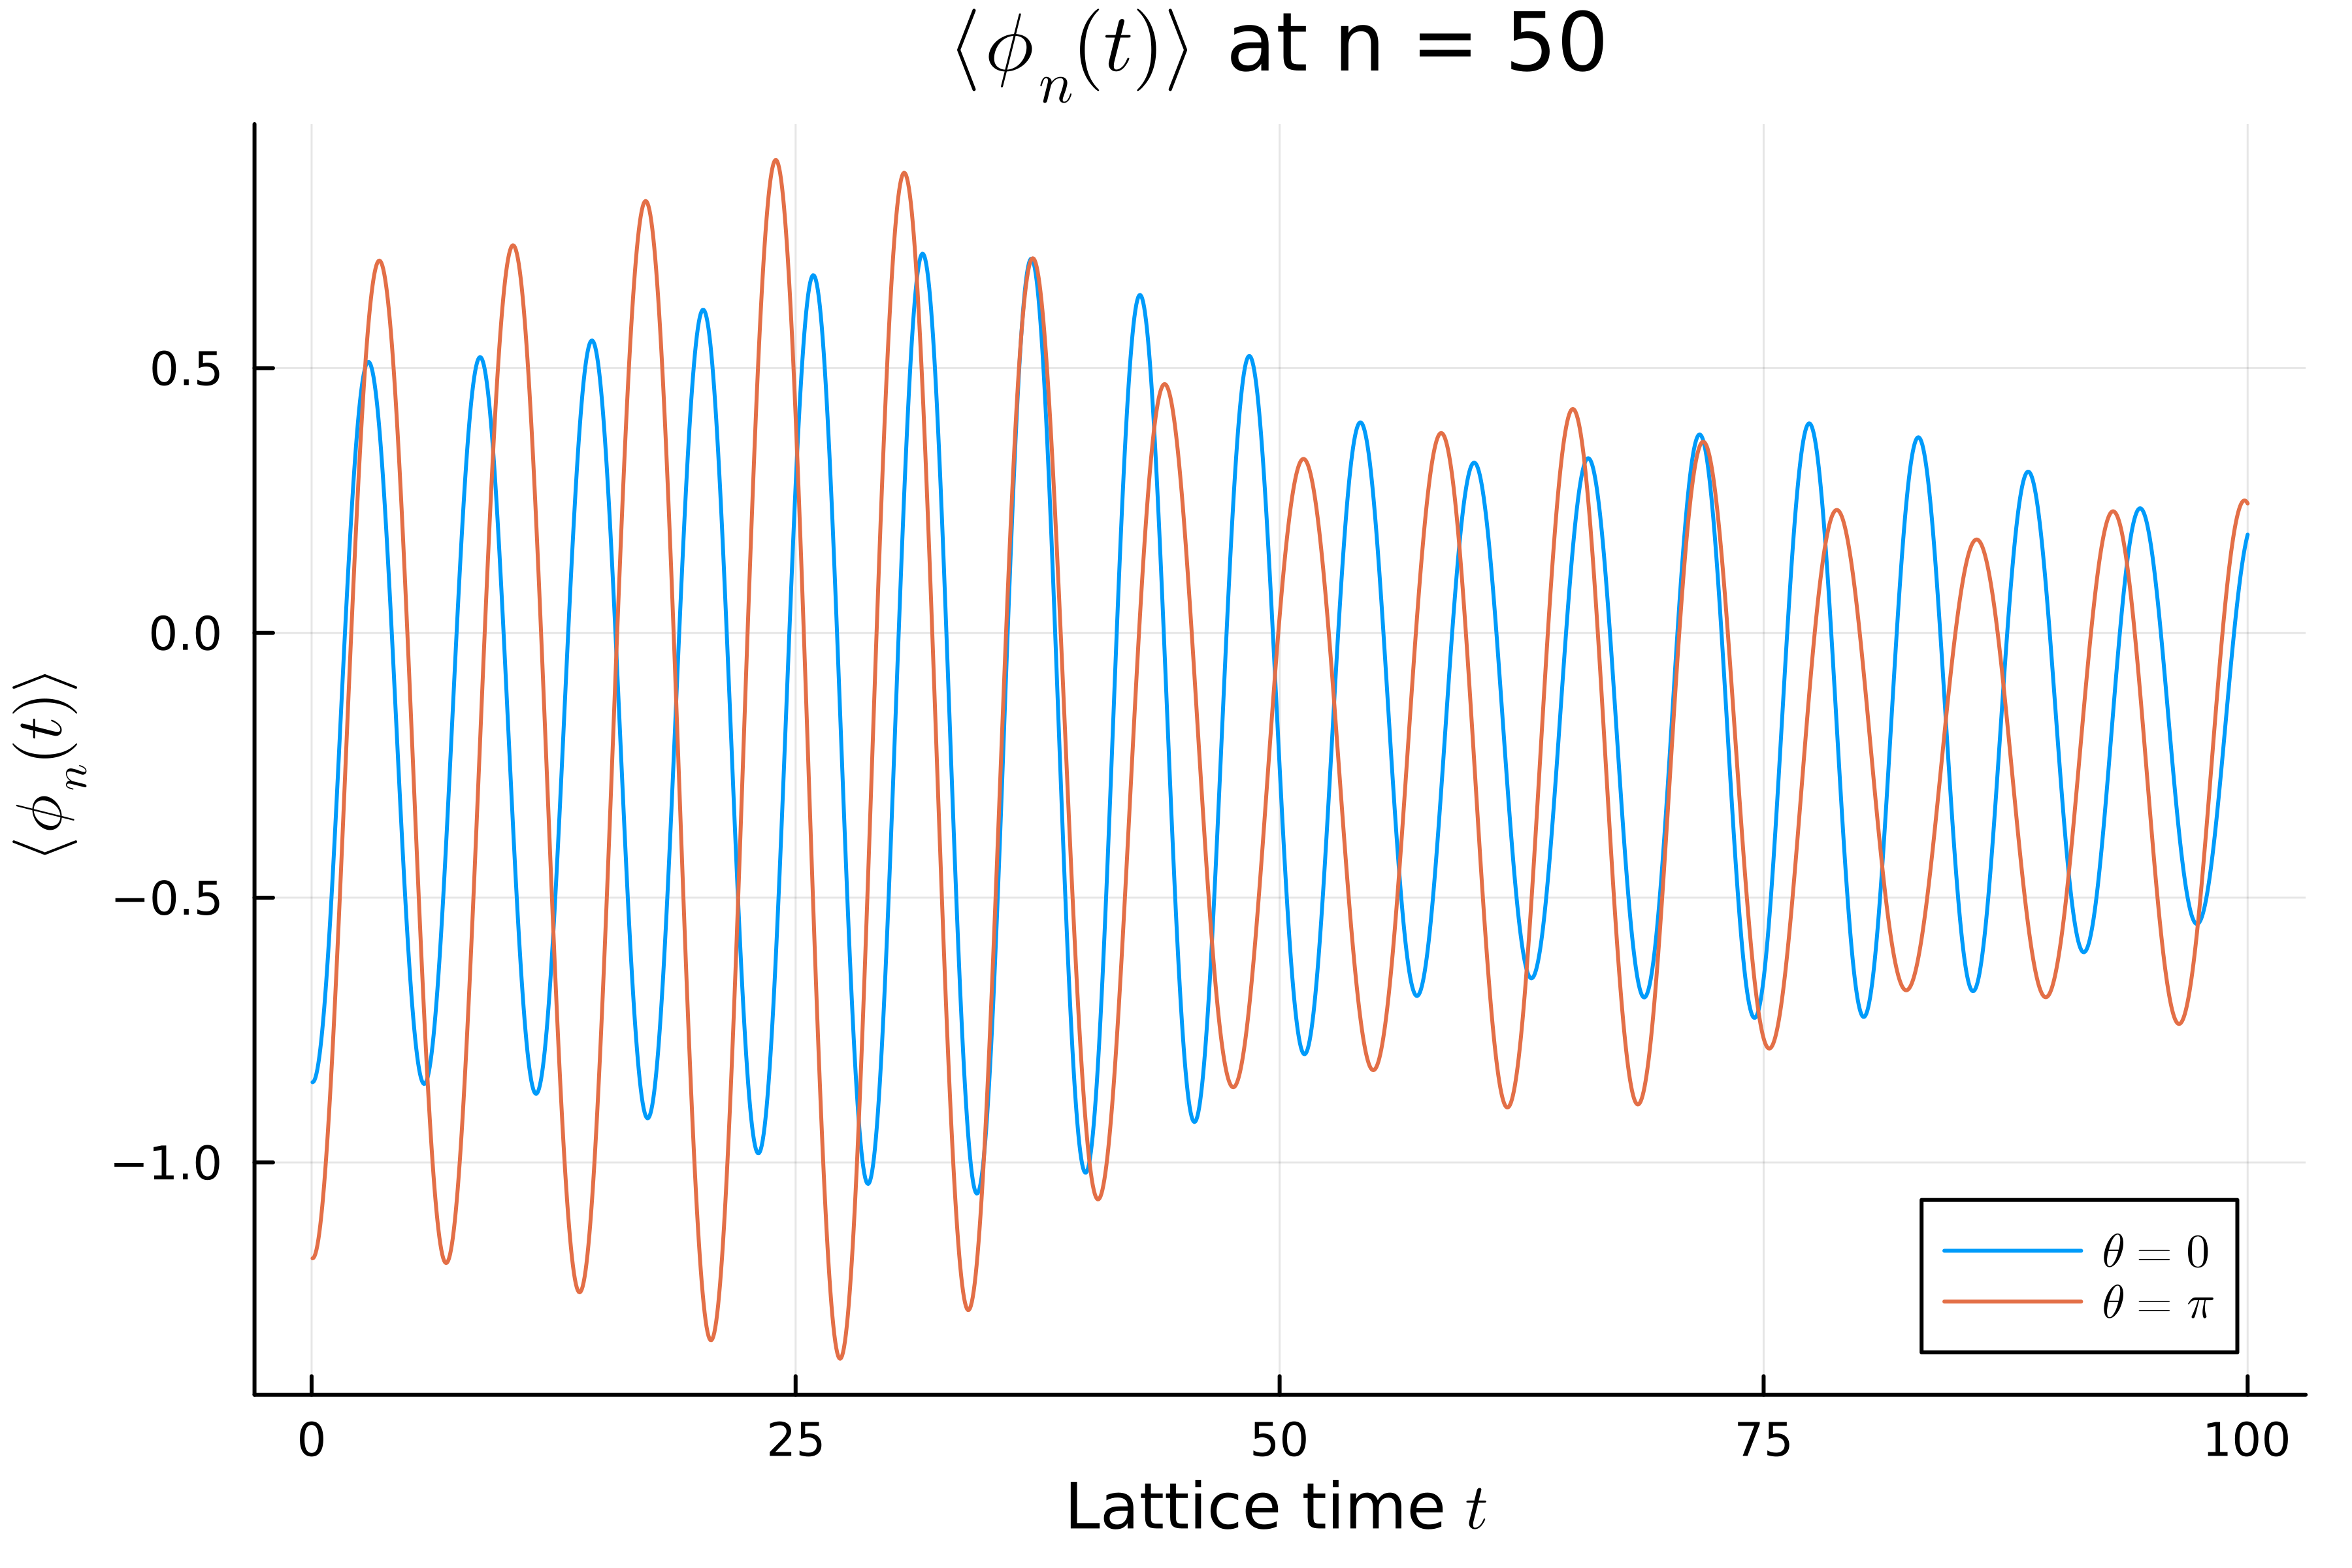

In [26]:
plot(0.05 * [1:2000], data_theta_0["flux"][:, 50], dpi=600, xlabel=L"Lattice time $t$", ylabel=L"$\langle \phi_n(t) \rangle$", title=L"$\langle \phi_n(t) \rangle$ at n = 50", label=L"$\theta = 0$")
plot!(0.05 * [1:2000], data_theta_pi["flux"][:, 50], label=L"$\theta = \pi$")

In [27]:
savefig("string_osc_schwinger.png")

"/home/ujjwal/MPSJulia/schwinger/string_osc_schwinger.png"